In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
de = pd.read_csv("framingham.csv")
df =de.fillna(0)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


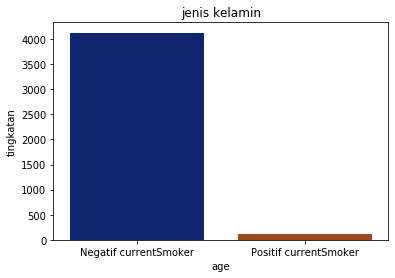

In [156]:
sns.countplot(x='diabetes', data=df,palette='dark')
plt.title("jenis kelamin")
plt.xlabel("age")
plt.ylabel("tingkatan")
plt.xticks([0,1],["Negatif currentSmoker","Positif currentSmoker"])
plt.show()

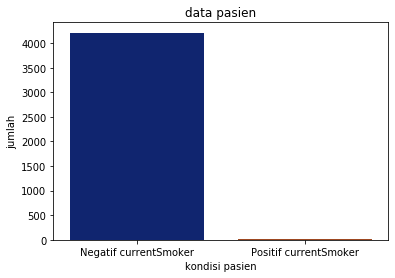

In [157]:
sns.countplot(x='prevalentStroke',data=df,palette='dark')
plt.title("data pasien")
plt.xlabel("kondisi pasien")
plt.ylabel("jumlah")
plt.xticks([0,1],["Negatif currentSmoker","Positif currentSmoker"])
plt.show()

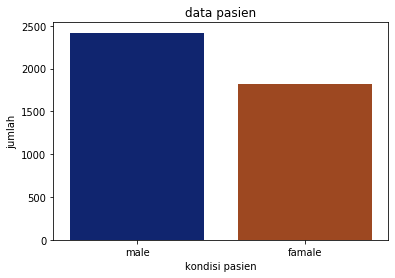

In [158]:
sns.countplot(x='male',data=df,palette='dark')
plt.title("data pasien")
plt.xlabel("kondisi pasien")
plt.ylabel("jumlah")
plt.xticks([0,1],['male','famale'])
plt.show()

In [159]:
x=df.drop(["TenYearCHD"], axis=1)
y=df["TenYearCHD"]


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [162]:
X_train = sc.transform(X_train)
X_test= sc.transform(X_test)

In [163]:

print(X_train)

[[-0.86474864  0.85764626 -0.87115739 ... -1.62757574 -1.31676116
   0.08052911]
 [-0.86474864  0.7403836  -0.87115739 ... -0.34754194 -0.31958754
   1.26974449]
 [ 1.1564054   1.20943423 -0.87115739 ... -0.5103731  -0.07029413
  -0.37686142]
 ...
 [-0.86474864 -0.90129359  0.08831265 ...  0.93927648 -0.07029413
   0.0195437 ]
 [ 1.1564054  -0.3149803   2.00725273 ...  0.89178406 -1.06746775
  -0.16341251]
 [-0.86474864 -1.01855624 -0.87115739 ...  1.97958664 -0.31958754
   0.29397802]]


In [164]:
from sklearn.naive_bayes import GaussianNB

mod_NB = GaussianNB()
mod_NB.fit(X_train, y_train)
y_pred = mod_NB.predict(X_test)

In [165]:
ikin=X_test[25]

In [166]:
data_pasien = mod_NB.predict([ikin])

print("=========prediksi========")
if data_pasien == 1:
    print(data_pasien,"mungkin bertahan rendah.!")
else:
    print(data_pasien,"mungkin tinggi")

=========prediksi========
[0] mungkin tinggi
